In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [43]:
df = pd.read_csv('Datasets/economic_index.csv')
df

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [44]:
# drop unnecessary column
# when drop columns specified axis
df.drop(columns=["Unnamed: 0","year","month"], axis=1, inplace=True)


In [45]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [46]:
# check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

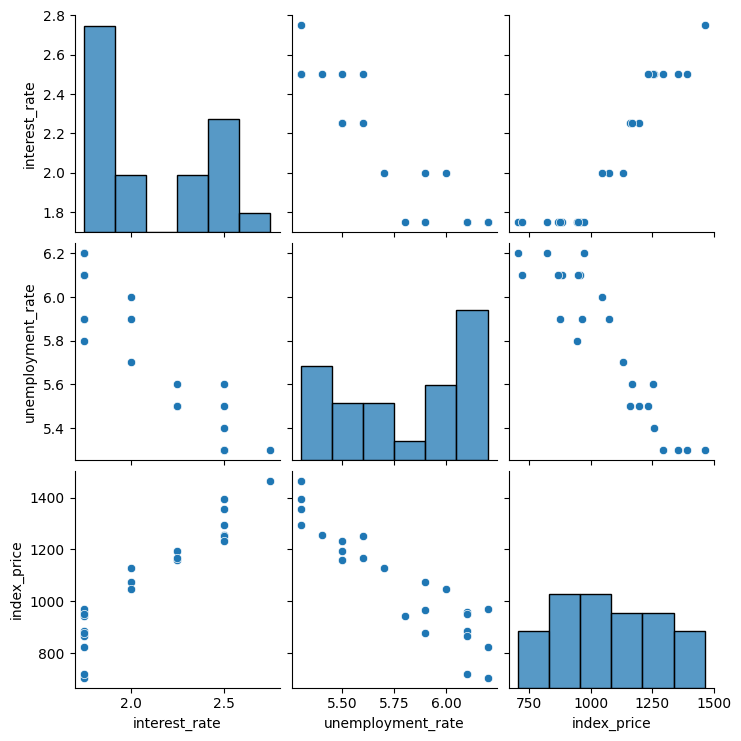

In [47]:
## visulaisation

import seaborn as sns

sns.pairplot(df)

In [48]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [49]:
# get Independedent and Dependent features
X = df.iloc[:,0:-1]
y = df.iloc[:,-1:]

In [53]:
type(y)

pandas.core.frame.DataFrame

In [54]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

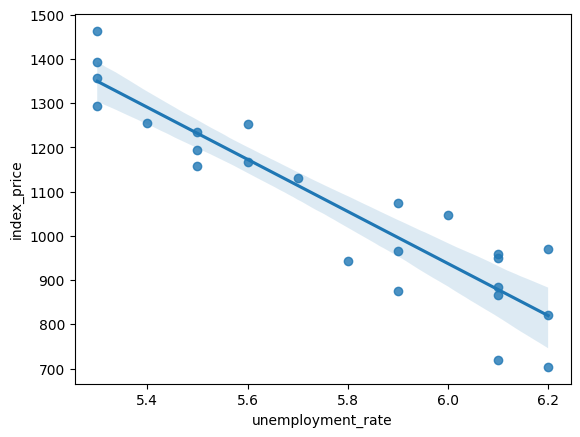

In [85]:
# regplot in seaborn will plot best fit line 
# work for only two features
sns.regplot(x="unemployment_rate", y="index_price", data=df)

In [60]:
# Standradation or scaleing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [62]:
# train model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [65]:
## Cross validation of model
from sklearn.model_selection import cross_val_score

## CV is number of chunk from train data
## 3 mens 3 fold of train data
## at time one fold work for validation and other data for training
## scoring = "neg_root_mean_squared_error" is metrics for calculating accuracy of model

validation_score = cross_val_score(reg, X_train, y_train, cv=3, scoring="neg_root_mean_squared_error")
validation_score

array([-70.15421094, -87.67482519, -71.66586534])

In [66]:
y_pred = reg.predict(X_test)
y_pred

array([[1204.22770398],
       [ 821.65051903],
       [1406.51300368],
       [ 857.70889608],
       [ 994.90992298],
       [1168.16932693]])

In [68]:
## Performance matrics

from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

5793.76288771258
59.93578152323554
76.11677139574813


In [69]:
## r2 score

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.8278978091457142

In [70]:
# adjusted r2 score

adj_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adj_score

0.713163015242857

# Assumptions

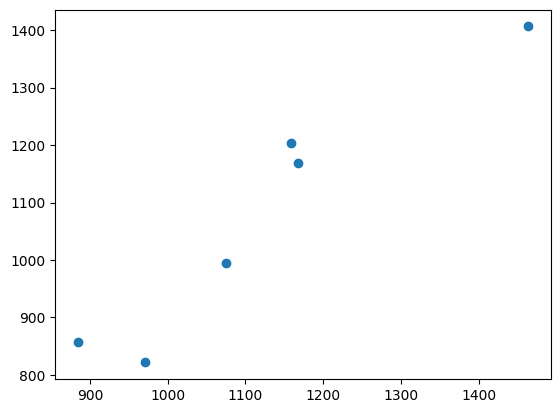

In [72]:
# y_test and y_pred have linear relation
plt.scatter(y_test, y_pred)

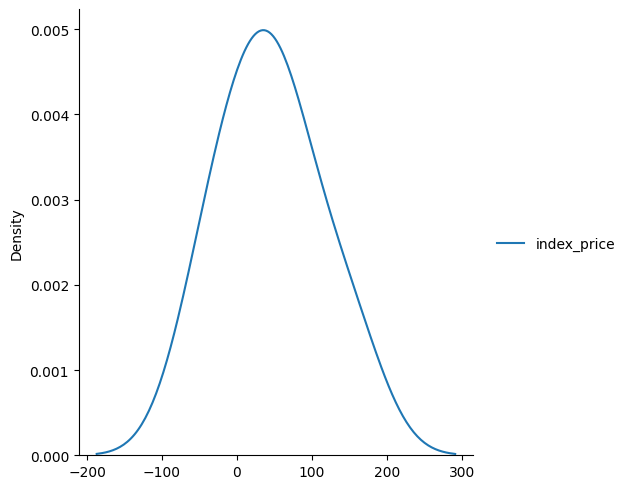

In [84]:
# resduals

error = y_test - y_pred
sns.displot(error, kind="kde")

# when we receved this type of normal distribution that means model is More accurate and Better fit

## OLS

In [79]:
# using OLS

import statsmodels.api as sm

ols = sm.OLS(y_train, X_train).fit()

In [80]:
ols.summary()

c:\Users\harshad.parmar\ML\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                       0.754
Time:                        17:20:01   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
reg.coef_

array([[  88.27275507, -116.25716066]])